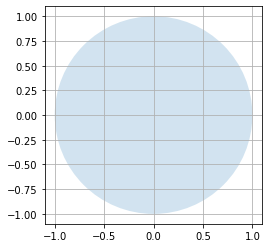

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
rx = 1
ry = 1
ellipse = Ellipse((0, 0), 2, 2, angle=0, alpha=0.2)
fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
ax.add_artist(ellipse)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.get_yaxis().grid(True)
ax.get_xaxis().grid(True)

In [3]:
# dist = distance between two horizontal/vertical neighbor points
def get_points(dist):
    points = []
    for i in np.arange(-rx, rx+dist, dist):
        for j in np.arange(-ry, ry+dist, dist):
            i = round(i,3)
            j = round(j,3)
            if ((np.power(i,2)/rx**2+np.power(j,2)/ry**2) <= 1):
                points.append((i,j))
    return points
points_in_ellipse = get_points(0.1)
print("The first 10 points of points_in_ellipse:")
print(points_in_ellipse[0:10])

The first 10 points of points_in_ellipse:
[(-1.0, -0.0), (-0.9, -0.4), (-0.9, -0.3), (-0.9, -0.2), (-0.9, -0.1), (-0.9, -0.0), (-0.9, 0.1), (-0.9, 0.2), (-0.9, 0.3), (-0.9, 0.4)]


In [4]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
def hull_area(in_points):
    hull = ConvexHull(in_points)
    hull_vertices_ = hull.vertices
    return hull.volume, len(hull_vertices_)
hull_area_, num_on_polygon_ = hull_area(points_in_ellipse)
print("hull area: " + str(hull_area_))

hull area: 3.039999999999999


In [5]:
ellipse_area = np.pi * rx * ry #Area of an ellipse = pi*rx*ry
error_area = ellipse_area - hull_area_
print("error area: " + str(error_area))
print("number of points on the polygon: " + str(num_on_polygon_))

error area: 0.10159265358979397
number of points on the polygon: 20


(-1.1, 1.1, -1.1, 1.1)

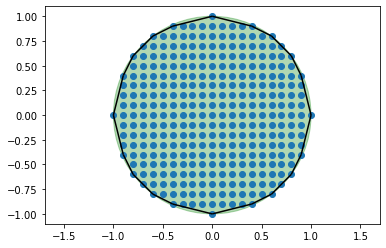

In [20]:
points_in_ellipse = np.array(points_in_ellipse)
hull = ConvexHull(points_in_ellipse)
x = convex_hull_plot_2d(hull)
circle1 = plt.Circle((0,0),1,color='g',alpha=0.3)
plt.gca().add_patch(circle1)
plt.axis("equal")


In [78]:
err_versus_dist = []
err_versus_one_over_nsqr = []
e_area = 0
for d in np.arange(0.002,1.002,0.002):
    points_ = get_points(d)
    hull_, point_numbers_on_poly = hull_area(points_)
    e_area = ellipse_area - hull_
    err_versus_dist.append((point_numbers_on_poly,e_area))
    err_versus_one_over_nsqr.append((1/np.power(point_numbers_on_poly,2),e_area))
err_versus_dist = np.array(err_versus_dist)
err_versus_one_over_nsqr = np.array(err_versus_one_over_nsqr)

Text(0, 0.5, 'error area')

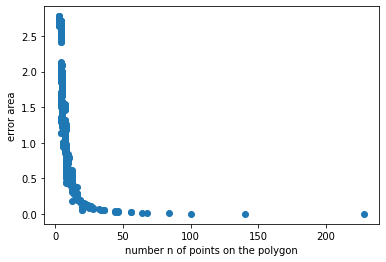

In [79]:
plt.scatter(err_versus_dist[:,0],err_versus_dist[:,1])
plt.xlabel("number n of points on the polygon")
plt.ylabel("error area")

Text(0, 0.5, 'error area')

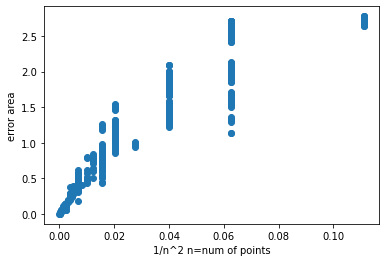

In [80]:
plt.scatter(err_versus_one_over_nsqr[:,0],err_versus_one_over_nsqr[:,1])
plt.xlabel("1/n^2 n=num of points")
plt.ylabel("error area")